#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
os.chdir('C:\\Users\\DELL\\Downloads\\titanic')

#loading the datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.width',1000)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
train.drop('Name',axis=1,inplace=True)

In [11]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#Identify how many males and females in the titanic

In [12]:
males = len(train[train['Sex'] == 'male'])
print('No of males in titanic',males)

No of males in titanic 577


In [13]:
females = len(train[train['Sex'] == 'female'])
print('No of females in titanic',females)

No of females in titanic 314


#Plotting 

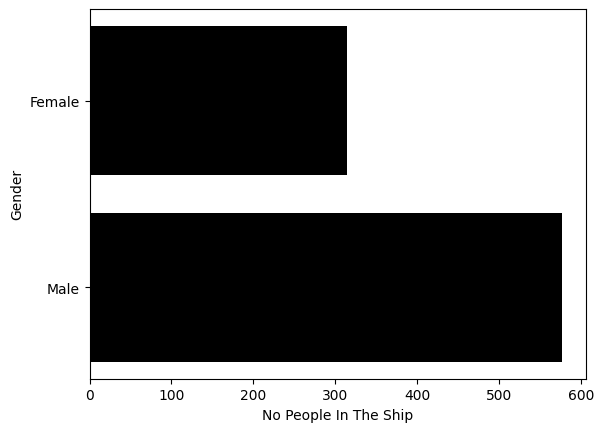

In [14]:
plt.figure()
gender =['Male','Female']
index = [577,314]
plt.barh(gender,index, color='black')
plt.xlabel('No People In The Ship')
plt.ylabel('Gender')
plt.show()

In [15]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [16]:
print(alive)
print(dead)

342
549


#plotting

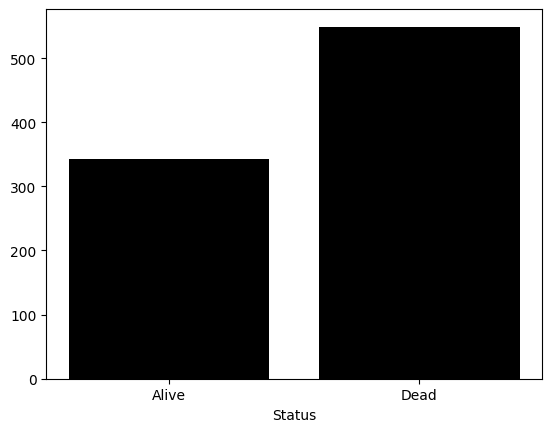

In [17]:
plt.figure()
people = [342,549]
survived =['Alive','Dead']
plt.bar(survived,people, color='black')
plt.xlabel('Status')
plt.show()

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people not survived')

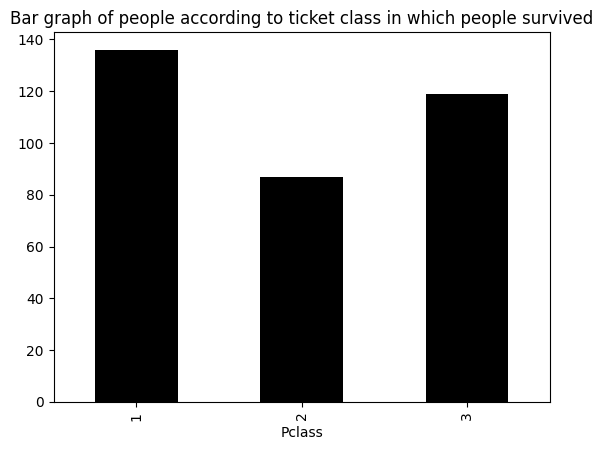

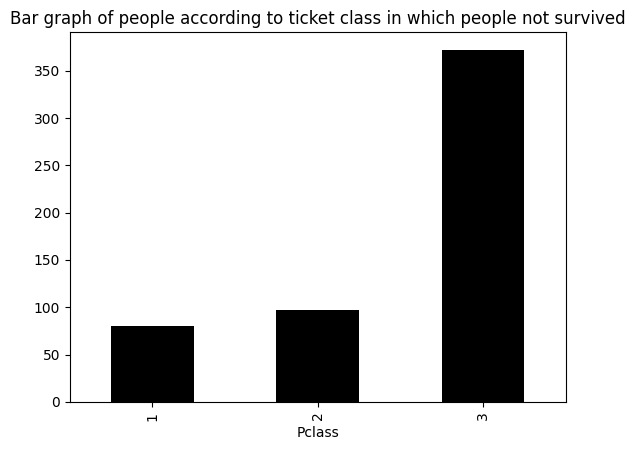

In [18]:
plt.figure(1)
train.loc[train['Survived'] == 1,'Pclass'].value_counts().sort_index().plot.bar(color='black')
plt.title("Bar graph of people according to ticket class in which people survived")

plt.figure(2)
train.loc[train['Survived'] == 0,'Pclass'].value_counts().sort_index().plot.bar(color='black')
plt.title("Bar graph of people according to ticket class in which people not survived")


([<matplotlib.axis.XTick at 0x289b3a2b620>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

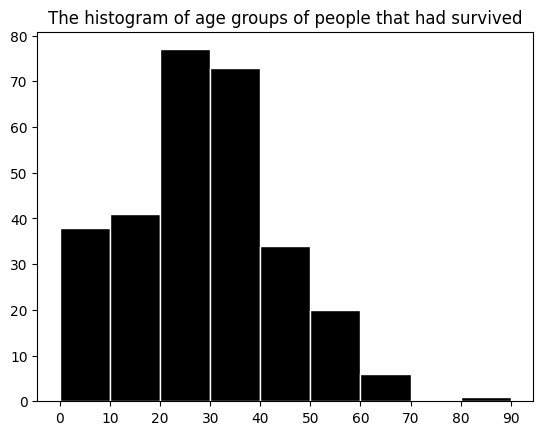

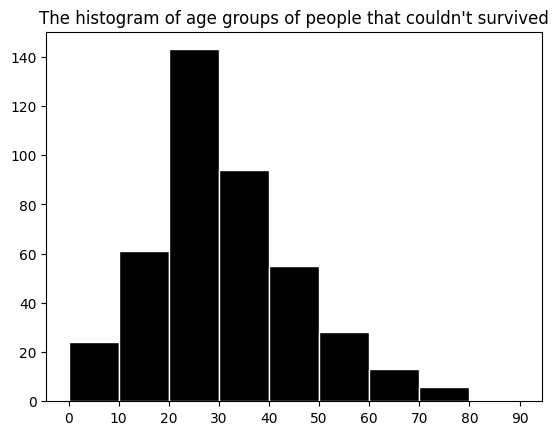

In [19]:
plt.figure(1)
age = train.loc[train['Survived'] == 1, 'Age']
plt.title("The histogram of age groups of people that had survived")
plt.hist(age,np.arange(0,100,10),color='black', edgecolor='white')
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = train.loc[train['Survived'] == 0, 'Age']
plt.title("The histogram of age groups of people that couldn't survived")
plt.hist(age,np.arange(0,100,10),color='black', edgecolor='white')
plt.xticks(np.arange(0,100,10))


In [20]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived' , ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
train[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Age' , ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [23]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


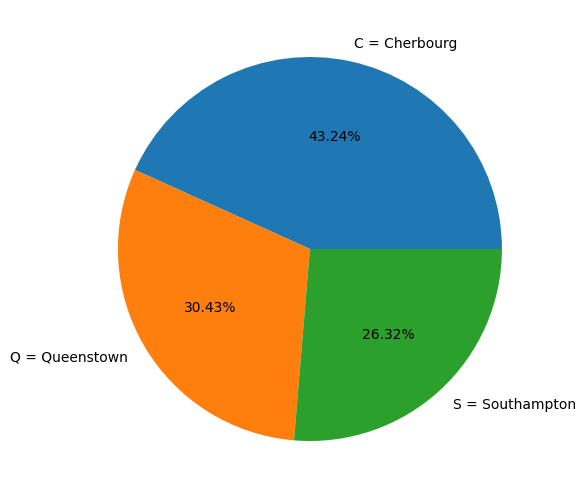

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l =['C = Cherbourg','Q = Queenstown','S = Southampton']
s =[0.553571,0.389610,0.336957]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

In [25]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [26]:
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)

In [27]:
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [28]:
column_train =['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X = train[column_train]
Y = train['Survived']

In [29]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [30]:
X['Age'] =X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [31]:
X['Embarked'] =X['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [32]:
s={'male':0,'female':1}
X['Sex'] = X['Sex'].apply(lambda x:s[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [33]:
e={'C':0,'Q':1,'S':2}
X['Embarked'] = X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test =train_test_split(X,Y,test_size=0.3,random_state=7)

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy Score:',accuracy_score(Y_test,Y_pred))

accuracy Score: 0.7798507462686567


In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[138  18]
 [ 41  71]]


In [37]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print('Acc',accuracy_score(Y_test,pred_y))

Acc 0.6604477611940298


In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [39]:
from  sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from  sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(Y_test,y_pred2))

Accuracy Score 0.6604477611940298


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [41]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from  sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(Y_test,y_pred3))

Accuracy Score 0.7686567164179104


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [43]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion ='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from  sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(Y_test,y_pred4))

Accuracy Score 0.7425373134328358


In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [45]:
results = pd.DataFrame({
    'Model':['HistGradientBoosting','Support Vector Machine','Naive Bayes','KNN','Decision Tree'],
    'Score':[0.78,0.66,0.77,0.66,0.74]
})
result_df = results.sort_values(by='Score',ascending = False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.78,HistGradientBoosting
0.77,Naive Bayes
0.74,Decision Tree
0.66,Support Vector Machine
0.66,KNN
